In [ ]:
from math import sqrt
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import pandas as pd
import numpy as np
spotify_songs = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-01-21/spotify_songs.csv')
Q1 = np.percentile(spotify_songs.duration_ms, 25,
                   interpolation = 'midpoint')
Q3 = np.percentile(spotify_songs.duration_ms, 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
#mask = (spotify_songs.duration_ms < (Q3+1.5*IQR))
#mask2 = spotify_songs.duration_ms > (Q1-1.5*IQR)
spotify_data_cleaned = spotify_songs
spotify_data_cleaned.track_album_release_date.str[:4]
spotify_data_cleaned.track_album_release_date.str[5:7]
spotify_data_cleaned = spotify_data_cleaned.assign(
    track_album_release_month = spotify_data_cleaned.track_album_release_date.str[5:7],
    release_year = spotify_data_cleaned.track_album_release_date.str[:4],
)
spotify_data_cleaned.drop(columns="track_album_release_date",inplace=True)
spotify_data_cleaned.release_year = spotify_data_cleaned.release_year.astype("int64")
#spotify_data_cleaned.track_album_release_month = spotify_data_cleaned.track_album_release_month.astype("int64")

#mask = (spotify_data_cleaned.track_popularity > 0)
#spotify_data_cleaned = spotify_data_cleaned.loc[mask]
spotify_data_quanti = spotify_data_cleaned[["track_popularity","danceability","energy","loudness","speechiness","acousticness","instrumentalness","liveness","valence","tempo","duration_ms","release_year"]]


In [ ]:
spotify_data_quanti

,track_popularity,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,66,0.748,0.916,-2.634,0.0583,0.102000,0.000000,0.0653,0.5180,122.036,194754
1,67,0.726,0.815,-4.969,0.0373,0.072400,0.004210,0.3570,0.6930,99.972,162600
2,70,0.675,0.931,-3.432,0.0742,0.079400,0.000023,0.1100,0.6130,124.008,176616
3,60,0.718,0.930,-3.778,0.1020,0.028700,0.000009,0.2040,0.2770,121.956,169093
4,69,0.650,0.833,-4.672,0.0359,0.080300,0.000000,0.0833,0.7250,123.976,189052
...,...,...,...,...,...,...,...,...,...,...,...
32828,42,0.428,0.922,-1.814,0.0936,0.076600,0.000000,0.0668,0.2100,128.170,204375
32829,20,0.522,0.786,-4.462,0.0420,0.001710,0.004270,0.3750,0.4000,128.041,353120
32830,14,0.529,0.821,-4.899,0.0481,0.108000,0.000001,0.1500,0.4360,127.989,210112
32831,15,0.626,0.888,-3.361,0.1090,0.007920,0.127000,0.3430,0.3080,128.008,367432


In [ ]:
spotify_data_cleaned 

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,playlist_name,playlist_id,playlist_genre,playlist_subgenre,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,track_album_release_month,track_album_release_year
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,...,1,0.0583,0.102000,0.000000,0.0653,0.5180,122.036,194754,06,2019
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,...,1,0.0373,0.072400,0.004210,0.3570,0.6930,99.972,162600,12,2019
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,...,0,0.0742,0.079400,0.000023,0.1100,0.6130,124.008,176616,07,2019
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,...,1,0.1020,0.028700,0.000009,0.2040,0.2770,121.956,169093,07,2019
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,...,1,0.0359,0.080300,0.000000,0.0833,0.7250,123.976,189052,03,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32828,7bxnKAamR3snQ1VGLuVfC1,City Of Lights - Official Radio Edit,Lush & Simon,42,2azRoBBWEEEYhqV6sb7JrT,City Of Lights (Vocal Mix),♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,progressive electro house,...,1,0.0936,0.076600,0.000000,0.0668,0.2100,128.170,204375,04,2014
32829,5Aevni09Em4575077nkWHz,Closer - Sultan & Ned Shepard Remix,Tegan and Sara,20,6kD6KLxj7s8eCE3ABvAyf5,Closer Remixed,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,progressive electro house,...,1,0.0420,0.001710,0.004270,0.3750,0.4000,128.041,353120,03,2013
32830,7ImMqPP3Q1yfUHvsdn7wEo,Sweet Surrender - Radio Edit,Starkillers,14,0ltWNSY9JgxoIZO4VzuCa6,Sweet Surrender (Radio Edit),♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,progressive electro house,...,0,0.0481,0.108000,0.000001,0.1500,0.4360,127.989,210112,04,2014
32831,2m69mhnfQ1Oq6lGtXuYhgX,Only For You - Maor Levi Remix,Mat Zo,15,1fGrOkHnHJcStl14zNx8Jy,Only For You (Remixes),♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,progressive electro house,...,1,0.1090,0.007920,0.127000,0.3430,0.3080,128.008,367432,01,2014


# Etude de corrélations des variables pour chaque genre

Ci-dessous la matrice de corrélation générale puis par genre. 

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='playlist_genre', ylabel='count'>

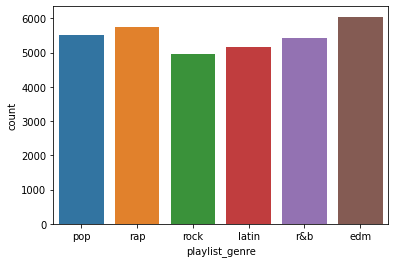

In [ ]:
sns.countplot(spotify_data_cleaned.playlist_genre)


<AxesSubplot:>

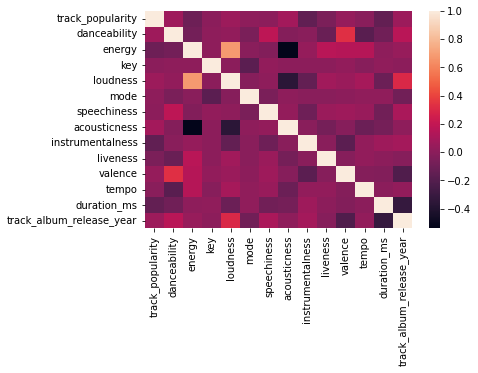

In [ ]:
sns.heatmap(spotify_data_cleaned.corr())

## Genre POP / Rock / R&B et Latin

Correlation positive :
- Loudness / Energy
- Valence / danceability

Correlation négative :
- Acousticness / Energy
- Acousticness / Loudness


### En fonction du genre, l'année de musique peut être corrélée à certains paramètres. Ce qui montre une évolution dans les différents genres.


<AxesSubplot:>

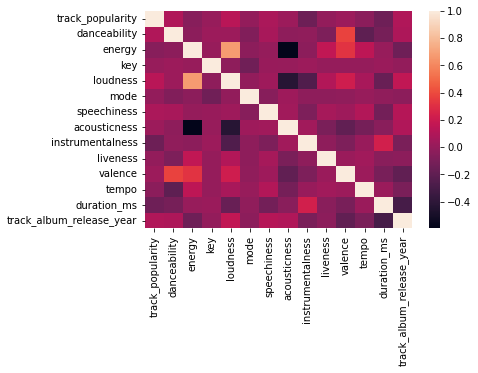

In [ ]:
mask_pop = (spotify_data_cleaned.playlist_genre == 'pop')
spotify_pop = spotify_data_cleaned.loc[mask_pop]
spotify_pop
sns.heatmap(spotify_pop.corr())

<AxesSubplot:>

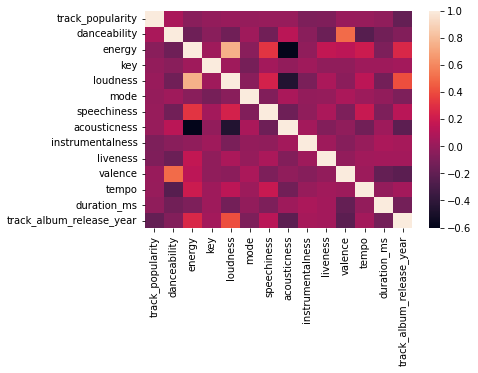

In [ ]:
mask_rock = (spotify_data_cleaned.playlist_genre == 'rock')
spotify_rock = spotify_data_cleaned.loc[mask_rock]
spotify_rock
sns.heatmap(spotify_rock.corr())

<AxesSubplot:>

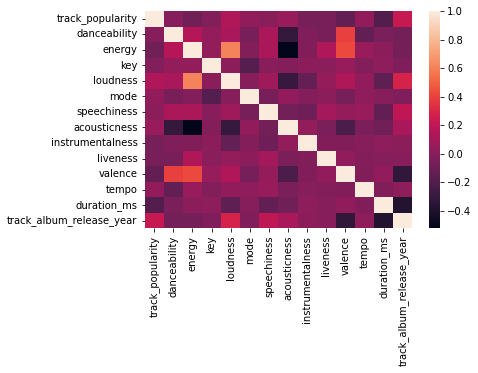

In [ ]:
mask_rb = (spotify_data_cleaned.playlist_genre == 'r&b')
spotify_rb = spotify_data_cleaned.loc[mask_rb]
spotify_rb
sns.heatmap(spotify_rb.corr())

<AxesSubplot:>

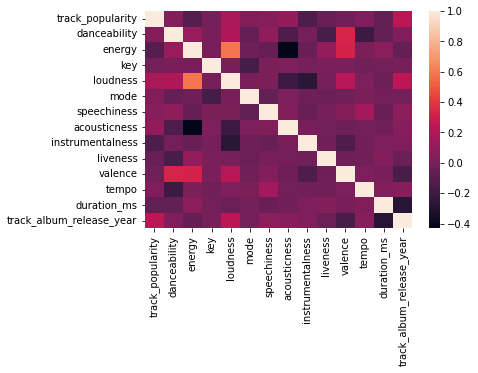

In [ ]:
mask_latin = (spotify_data_cleaned.playlist_genre == 'latin')
spotify_latin = spotify_data_cleaned.loc[mask_latin]
spotify_latin
sns.heatmap(spotify_latin.corr())

Pour latin, on ajoute une corrélation négative entre Instrumentalness et Loudness

## Pour RAP

Corrélation complètement différente.

Positive :
- Loudness / Energy
- Instrumentalness / Acousticness

Négative :
- Acousticness / Energy, Loudness, Duration
- Instrumentalness / Energy, Loudness, Duration


<AxesSubplot:>

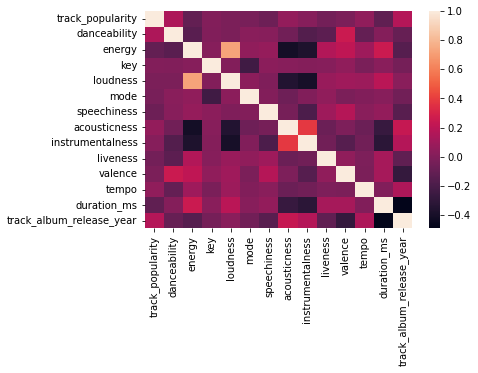

In [ ]:
mask_rap = (spotify_data_cleaned.playlist_genre == 'rap')
spotify_rap = spotify_data_cleaned.loc[mask_rap]
spotify_rap
sns.heatmap(spotify_rap.corr())

## Pour EDM

Corrélation positive :
- Loudness / Energy toujours
- Valence / Danceability
- Duration / Instrumentalness

Corrélation négative :
- Acousticness / Enery
- Duration / Loudness
- Track Popularity / Instrumentalness et Duration

### Premiere fois que Track Popularity est corrélé

<AxesSubplot:>

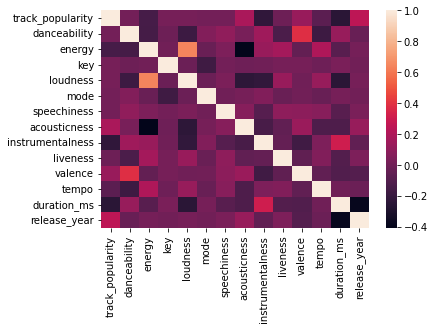

In [ ]:
mask_edm = (spotify_data_cleaned.playlist_genre == 'edm')
spotify_edm = spotify_data_cleaned.loc[mask_edm]
spotify_edm
sns.heatmap(spotify_edm.corr())

# BROUILLON

In [ ]:
for i in np.unique(spotify_data_cleaned.playlist_genre) :
    print(i)


edm
latin
pop
r&b
rap
rock


## Test ACP sur Rap uniquement par exemple

Vu le résultat j'ai surement fait n'importe quoi

[[-4.58093071e-04  4.94329135e-04  8.50894277e-03  8.90600961e-05
  -5.74052871e-04 -4.36429277e-04 -7.57588136e-05 -1.57628999e-04
   9.99963292e-01]
 [ 5.37785011e-04 -4.02476101e-02 -9.98336272e-01  6.07739578e-04
   2.51721284e-02  3.04302968e-02 -3.71206046e-03 -7.60158700e-03
   8.54143890e-03]]


<BarContainer object of 2 artists>

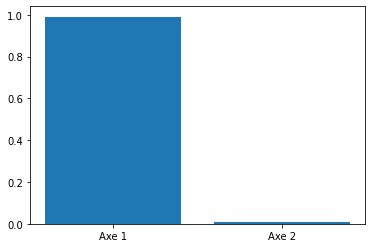

In [ ]:
cls = PCA(n_components=2)
spotify_data_rap = spotify_rap[["danceability","energy","loudness","speechiness","acousticness","instrumentalness","liveness","valence","tempo"]]
pcs = cls.fit_transform(spotify_data_rap)
print(cls.components_)
plt.bar(["Axe 1", "Axe 2"], cls.explained_variance_ratio_)

# Etude sur les subgenres

Possibilité de voir de même sur les subgenres (dans ce cas écrire une fonction pour automatiser)

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='playlist_subgenre', ylabel='count'>

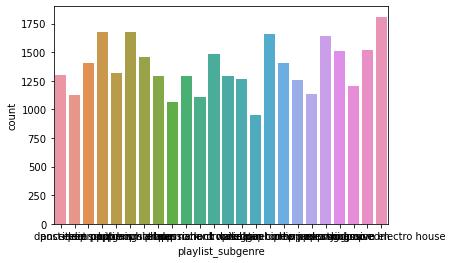

In [ ]:
sns.countplot(spotify_songs.playlist_subgenre)
 

In [ ]:
spotify_songs.sort_values(by=['track_popularity'], ascending=False)[['track_name', 'track_popularity']].head(20)


,track_name,track_popularity
20091,Dance Monkey,100
1551,Dance Monkey,100
30202,ROXANNE,99
23104,ROXANNE,99
21468,ROXANNE,99
20092,ROXANNE,99
30209,Circles,98
19715,Blinding Lights,98
19740,Circles,98
20252,Tusa,98


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=c2ad4461-7f35-42f5-b2d9-f686e8952f67' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>